# Peer Review Assignment 4

Name: Neelkanth Mehta

Date: October 30, 2018

## Instructions

* Work through the notebook, answer all questions, and do all problems
* You are allowed to consult the internet, and discuss on the module forum
* Your answers and solutions to the problems should be added to this notebook 
* Submit your final work as an html file
* Note that the solutions to the problems used python version 3.6.4.  

## Marking Scheme (Theoretical Questions)
* All questions are marked out of 3.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 1 mark
* 'Perfect' answer: 3 marks

## Marking Scheme (Practical Problems)
* All problems are marked out of 5.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 2 mark
* Working code: 5 marks

---

## K-Means

In this assignment you are given unlabeled data and you need to assign each data point to one of $k$ classes.

You will investigate two different approaches, $k$-means, and Gaussian Mixture Models (GMM's).

In [1]:
# Setting for Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [28]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

from numpy.random import randint
from skimage import io
from ipywidgets import interact

## Perform $k$-means on an image
In this exercise we will perform $k$-means clustering on an image of a cartoon penguin. The reason for such an image is that the original image has less than 10 easy to identify colours. 

We are going to compress the size of the image by reducing the number of colours used.

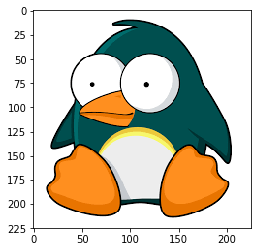

In [3]:
# Display simple image
im = io.imread('./cartoon.png')
plt.imshow(im/np.max(im))
plt.show()

---
### Problem 1 (5 marks):
Note that the colors in the image above are clustered around only a few colors. 

1. Find the color-clusters using the k-means algorithm in scikit-learn. If you use only 3 clusters, you should see an image something like the image below.
2. How many clusters do you need for perfect reproduction?

**Hints**: 
1. Set the number of clusters you want
2. Fit a KMeans model using sklearn, read the documentation
3. Use the model to extract the labels and the cluster_centers
4. Run a for loop to change each pixel in the image: <font color=red> I don't quite understand what this subquestion wants me to do; I mean the loop over each pixel to change to what? The var 'y_kmeans' defined below does just that </font>
5. Before you produce the plot using plt.imshow(), make sure the image data is of    type "unint8", i.e. set dtype = "uint8":
   * new_image = new_image.reshape(m, n, 3)
   * new_image = np.asarray(new_image, dtype="uint8")
6. Plot using plt.imshow(new_image)

### Solution:

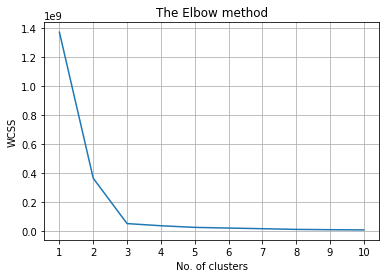

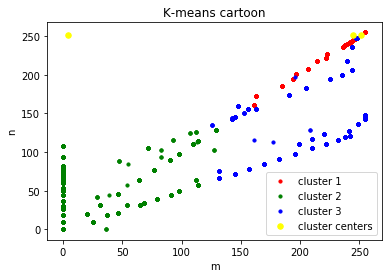

In [4]:
# Format data
m, n = im.shape[:2]
data = im.reshape(m*n, 3)
data = np.array(data, dtype = float)

# Your code here
# Finding the number of optimal clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


# Elbow plot revealing No. of optimal clusters:
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.xticks(np.arange(1,11, step=1))
plt.show()


# As the plot above depicts #3 clusters is the most optimal no. of clusters for the image, we shall now fit the KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Changing each 
y_kmeans = kmeans.fit_predict(data)

# plotting the clusters
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=10, c='red', label='cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=10, c='green', label='cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=10, c='blue', label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:1], s=30, c='yellow', label='cluster centers')
plt.title('K-means cartoon')
plt.xlabel('m')
plt.ylabel('n')
plt.legend(loc='best')
plt.show()

# # plt.imshow(y_kmeans)
# # plt.show()

You need about **3** colours to replicate the image

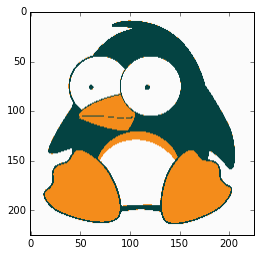

In [5]:
display(Image(filename='./cartoon_repro.png'))

---
## Clustering of Digits Data

For the next problem you use $k$-means to cluster the digits data in the scikit-learn library. Note that the digits in the sklearn library is of lower resolution than the MNIST digits. This helps speeding up the experiments.

Although the digits data comes with labels, for your first task you ignore the labels and just see how well $k$-means clusters the different digits.

Before you get to that, though, this is a good opportunity to investigate the use of PCA and LDA on higher dimensional data!

### Load the Digit Datasets

The datasets are loaded into a dictionary.

In [6]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [7]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))
print (number_digits)

10


### Inspect the Different Digit Images

In [8]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    plt.imshow(digits.images[k], cmap=cm.binary)   
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 

interactive(children=(IntSlider(value=0, description='k', max=1796), Output()), _dom_classes=('widget-interact…

---
## Project onto 2 PCA Components

### Problem 2 (5 marks):

1. Use the scikit-learn module and project the digits data onto 2 principal components. Display the clusters in different colors using the known labels.

### Solution

In [9]:
# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

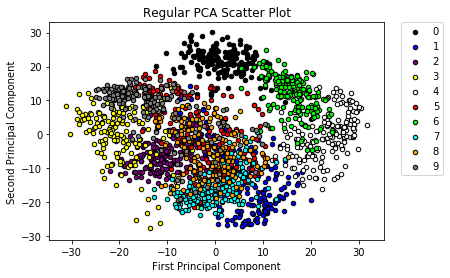

In [10]:
# Don't change the code in this block
colors = ['black', 'blue', 'purple', 'yellow', 'white',
          'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits.target == i]
    y = reduced_data_pca[:, 1][digits.target == i]
    plt.scatter(x, y, marker='o', s=20, facecolors=colors[i], edgecolors='k')
    
# PCA Scatter Plot
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("Regular PCA Scatter Plot")
plt.show()

### Expected Output

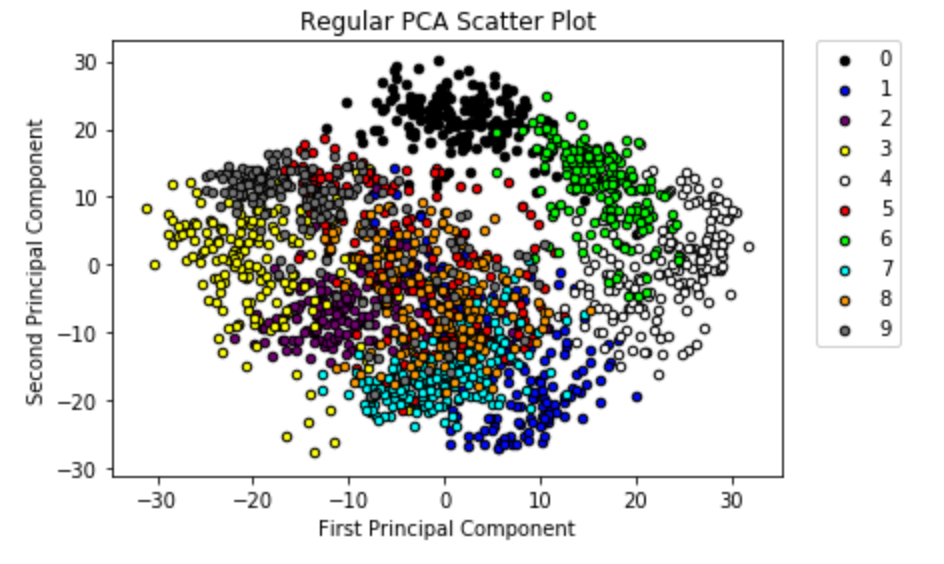

In [11]:
display(Image(filename='./PCA.png'))

---
## Project onto 2 LDA Components

### Problem 3 (5 marks):

1. Use the scikit-learn module and project the digits data onto 2 LDA. Display the clusters in different colors using the known labels.

### Solution

In [12]:
# Create a regular LDA model 
lda = LDA(n_components=2)

# Fit and transform the data to the model
reduced_data_lda = lda.fit_transform(digits.data,digits.target)

C:\Users\neelkanth mehta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


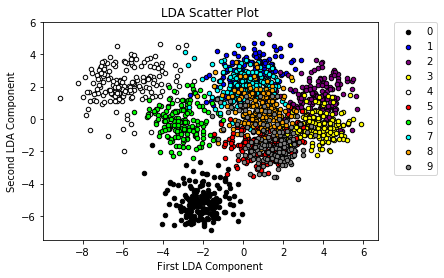

In [13]:
# Don't change the code in this block
colors = ['black', 'blue', 'purple', 'yellow', 'white',
          'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_lda[:, 0][digits.target == i]
    y = reduced_data_lda[:, 1][digits.target == i]
    plt.scatter(x, y, marker='o', s=20, facecolors=colors[i], edgecolors='k')
    
# LDA Scatter Plot
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.title("LDA Scatter Plot")
plt.show()

### Expected Output

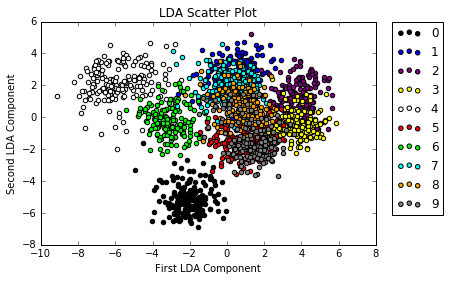

In [14]:
display(Image(filename='./LDA.png'))

---
## Clustering the Digits Data

Now that we have again demonstrated how much better LDA is if we are dealing with different labeled data, we are ready to cluster the digits using $k$-means. Remember that you are no longer allowed to attach any labels to the different data points.


### Split the Data Into Test and Training Sets

scikit-learn provides a convenient function to split given data into training, validation and test sets in its model_selection package.  Let's do that first.

In [15]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

In [16]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print('Number of samples:', n_samples)

# Print out `n_features`
print('Number of features:', n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))
print ('Number of training labels:', n_digits)

# Inspect `y_train`
print('Number of labled data:', len(y_train))

Number of samples: 1347
Number of features: 64
Number of training labels: 10
Number of labled data: 1347


---
## $K$-Means Model

### Problem 4 (5 marks):

1. Create the $k$-means model for the digits in the training set and display the means.

### Solution

In [17]:
# Create the KMeans model
# insert the code. Make sure you set init='k-means++', and random_state=42
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=42)

# Fit the training data to the model
# insert code
y_kmeans = kmeans.fit_predict(X_train)

# Retrieve the cluster centres
# insert code
centres = kmeans.cluster_centers_

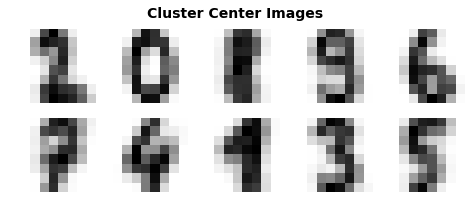

In [18]:
# Don't change the code in this cell
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(centres[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

### Expected Output

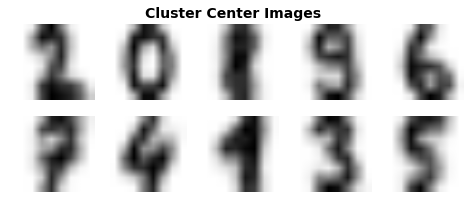

In [19]:
display(Image(filename='./kmeans_digits.png'))

---
## Confusion Matrix

### Problem 5 (5 marks):

1. Predict the labels of the digits in the test set, using the k-means model you created above. 
2. Compare against the known labels using a confusion matrix.
3. Note: why are the predictions so poor? 

### Solution

In [20]:
# Predict the labels for `X_test`
# Insert code
y_kmeans_pred = kmeans.predict(X_test)

# Print out the confusion matrix with `confusion_matrix()`
# insert code
confusion_matrix(y_test, y_kmeans_pred)

array([[ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0, 20,  0,  0,  0,  0, 10,  0,  0],
       [33,  0,  3,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  2,  3,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  1,  0,  0,  2, 51,  1,  0,  0],
       [ 0,  0,  0, 17,  1,  0,  0,  0,  0, 41],
       [ 0,  1,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0, 21, 13,  0,  1,  0,  0,  1,  2],
       [ 0,  0,  0, 38,  0,  3,  0,  3,  2,  2]], dtype=int64)

### Expected Output
Very few correctly predicted values, shown by a lack of values on the diagonal.

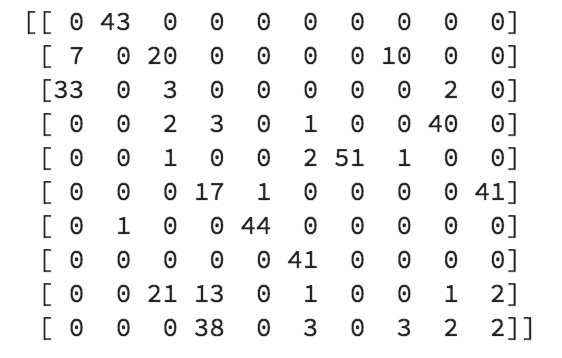

In [21]:
display(Image(filename='./confusion_matrix1.png'))

You should have observed serious problems with the confusion matrix above. 

---
### Problem 6 (5 marks):
1. Next try to initialize the k-means algorithm by providing one random sample from each class as the initial mean estimate for each cluster. You are allowed to make use of the class labels in order to draw a random sample from each class. 
2. Again plot the class means as above, predict the labels of the test data, and show the confusion matrix. Is there any improvement?


### Solutions

In [22]:
# Your code here
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1 Random selecting clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on clisest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X_test, n_clusters=10)

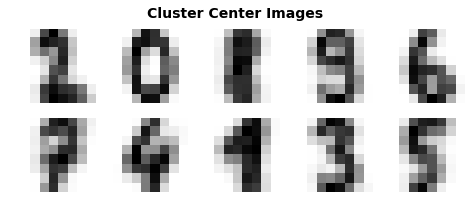

In [23]:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(centres[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [24]:
y_kmeans_pred = kmeans.predict(X_test)

confusion_matrix(y_test, y_kmeans_pred)

array([[ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0, 20,  0,  0,  0,  0, 10,  0,  0],
       [33,  0,  3,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  2,  3,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  1,  0,  0,  2, 51,  1,  0,  0],
       [ 0,  0,  0, 17,  1,  0,  0,  0,  0, 41],
       [ 0,  1,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0, 21, 13,  0,  1,  0,  0,  1,  2],
       [ 0,  0,  0, 38,  0,  3,  0,  3,  2,  2]], dtype=int64)

### Expected Outputs

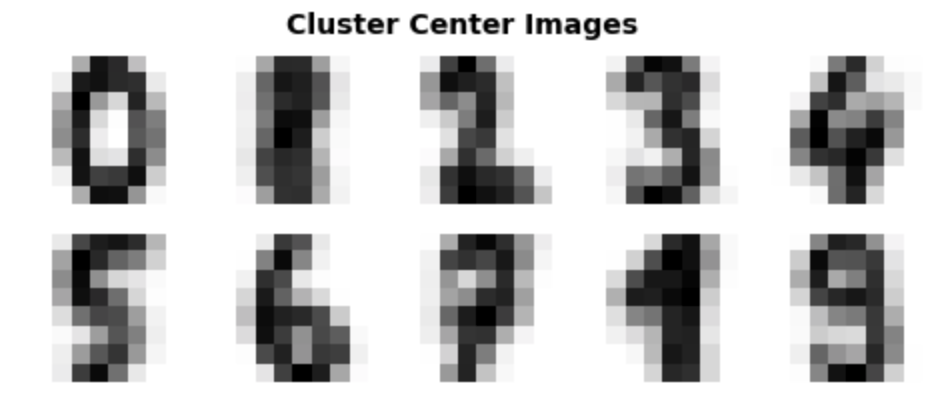

In [25]:
display(Image(filename='./cluster_centre_images_1.png'))

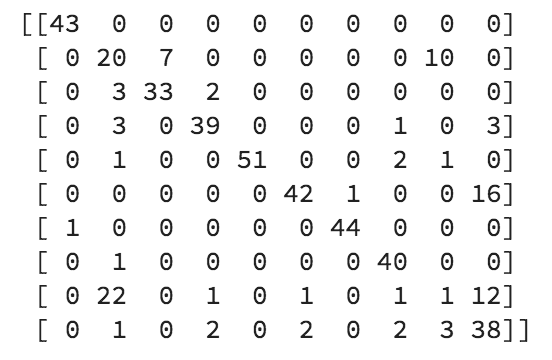

In [26]:
display(Image(filename='./confusion_matrix2.png'))

---
## GMM

Now we fit the digits to an GMM model with 10 mixture components.

### Problem 7 (5 marks):

1. Fit the training data to a 10 component GMM model, using the scikit-learn package.
2. Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.

** Hints **
1. When setting the GMM model, set covariance_type='full'.

# Solution

In [42]:
data = X_train.data
np.random.seed(1)

# Your code here
gmm_model = GaussianMixture(n_components=10, covariance_type='full', random_state=42).fit(data)

In [43]:
# Extract the means as well as the covariances
# Your code here
mns = gmm_model.means_
covs = gmm_model.covariances_

# Reshape the images
im = mns.reshape(10, 8, 8)

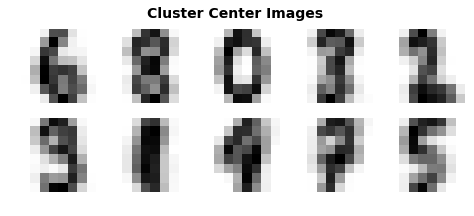

In [44]:
# Don't change this code
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    
    # Display images
    ax.imshow(im[i].reshape((8, 8)), cmap=cm.binary)
    plt.axis('off')

# Show the plot
plt.show()

### Expected output

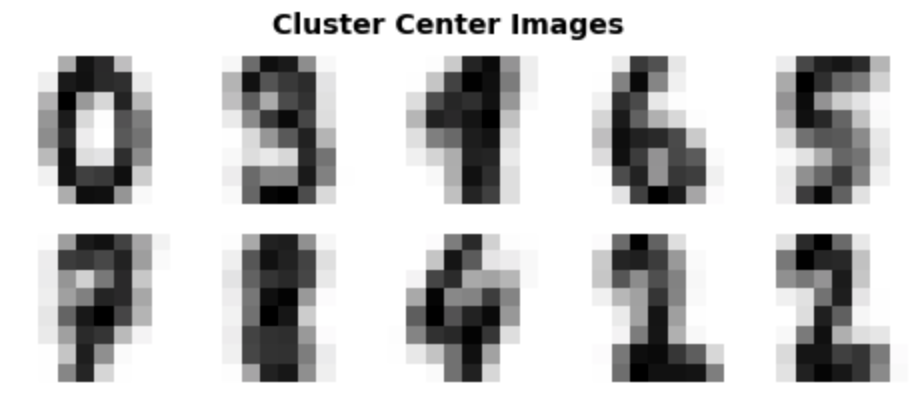

In [32]:
display(Image(filename='./GMM.png'))

___
## Generate Samples from the GMM

### Problem 8 (5 marks):
1. Use the means and covariances of the different components and draw a sample from each component. 
2. Display the samples in an image.
3. **Hint**: Read the documentation of scipy.stats.multivariate_normal

### Solution

In [45]:
print (mns.shape)
print (covs.shape)

(10, 64)
(10, 64, 64)


In [ ]:
# Your code here
samples = np.zeros((10,64))

for i in range(10):
    samples[i] =

im = samples.reshape(10,8,8)   

In [ ]:
# Don't Change this code
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(im[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

### Expected Output
You should see something close to this:

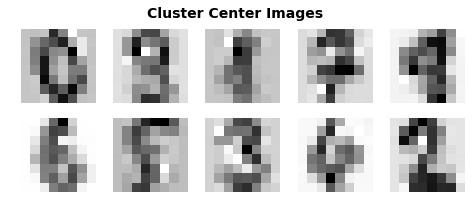

In [20]:
display(Image(filename='./GMM_generate.png'))